In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

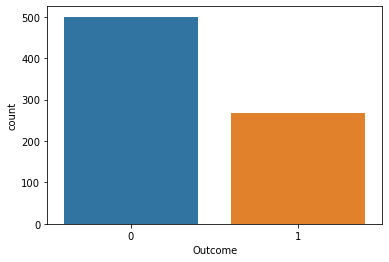

In [7]:
sns.countplot(x=df['Outcome'])

In [8]:
x=df.drop(['Outcome'],axis=1)
y= df['Outcome']

In [9]:
x.shape

(768, 8)

In [10]:
y.shape

(768,)

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
s_s= StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [14]:
x_train.shape

(614, 8)

In [15]:
x_test.shape

(154, 8)

In [16]:
x_train=s_s.fit_transform(x_train)
x_test=s_s.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
lr = LogisticRegression()
rf = RandomForestClassifier()
svc= SVC(kernel="linear")

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
def predection(model):
    model.fit(x_train,y_train)
    y_train_pred=lr.predict(x_train)
    y_test_pred=lr.predict(x_test)
    print("Train Data")
    print(classification_report(y_train,y_train_pred))
    print("Test Data")
    print(classification_report(y_test,y_test_pred))
    

In [21]:
predection(svc)

Train Data
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       399
           1       0.75      0.61      0.67       215

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Test Data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



In [22]:
predection(lr)

Train Data
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       399
           1       0.75      0.61      0.67       215

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Test Data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



In [23]:
predection(rf)

Train Data
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       399
           1       0.75      0.61      0.67       215

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.79       614

Test Data
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



In [24]:
import pickle
fp=open("model.pkl","wb")
pickle.dump(lr,fp)
fp.close()

In [25]:
fp1=open("std_s.pkl","wb")
pickle.dump(s_s,fp1)
fp1.close()